In [1]:
__author__ = "@Tssp"
__date__   = "04/01/2021"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=18
plt.rcParams['axes.titlesize']=18
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [2]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [3]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [4]:
np.sqrt(6604/4993)

1.1500659600202747

In [5]:
print(os.getcwd())
folder_path = "Simulations/ix6604_iy4993_iz4993/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q3d


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x10000_y10000_z10000_120rm8g2l60m14_68CM8g1L60M14_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix6604_iy4993_iz4993_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69700', '.69800', '.70100', '.70200', '.70555', '.70560', '.70565', '.70570', '.70575', '.707666', '.707891', '.7081066', '.70825', '.70830', '.7083468', '.70835', '.70840', '.70845', '.708483', '.70850', '.70870', '.70875', '.708822', '.70885', '.70890', '.7090032', '.7090948', '.7092404', '.70910', '.70915', '.7091583', '.70920', '.70925', '.70930', '.70935', '.70940', '.70945', '.70950', '.70955', '.70960', '.70965', '.70970', '.70975', '.70980', '.70985', '.70990', '.70995', '.71000', '.71005', '.71010', '.71015', '.71020', '.71025', '.71030', '.71035', '.71040', '.71045', '.71050', '.71055', '.71060', '.71065', '.71070', '.71075', '.71080', '.71085', '.71090', '.71095', '.71100', '.71105', '.71110', '.71115', '.71120', '.71125', '.71130', '.71135', '.71140', '.71145', '.71150', '.71155', '.71160', '.71165', '.71170', '.71175', '.71180', '.71185', '.71190', '.71195', '.71200', '.71205', '.71210', '.71215', '.71220', '.71225', '.71230'

In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
least_bound_pos = 1000

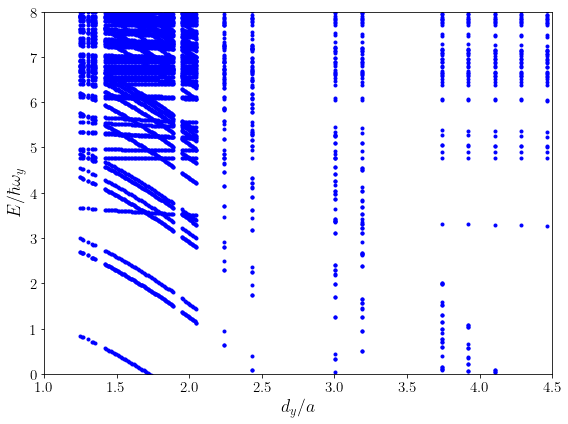

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
#ax.plot(x, dic['nivel_1004']/wy, 'r')
ax.set_ylim(0, 8)
ax.set_xlim(1, 4.5)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix6604_Iy4993_Iz4993_Easc.png', dpi=200)
plt.show()

# Crosses

In [12]:
%matplotlib inline

## Resonance x=0

1001
1002
1003


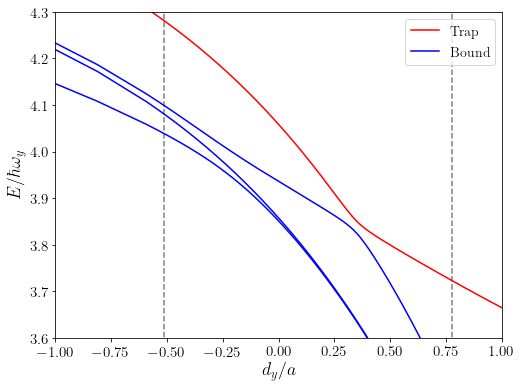

In [12]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r', label='trap')
for i in range(least_bound_pos+1, least_bound_pos + 4):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b', label='Data')
ax2.vlines(x[-19], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.vlines(x[-140], 3.5, 4.3, alpha=0.5, linestyles='--')
ax2.set_ylim(3.6, 4.3)
ax2.set_xlim(-1, 1)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix5505_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [13]:
print(f'''To find the eigenstates:
x={x[-19]}, delta=0{delta[-19]}
x={x[-140]}, delta=0{delta[-140]}''')

To find the eigenstates:
x=-0.5116376524089361, delta=0.71760
x=0.7763496372772335, delta=0.71140


## Resonance x>1

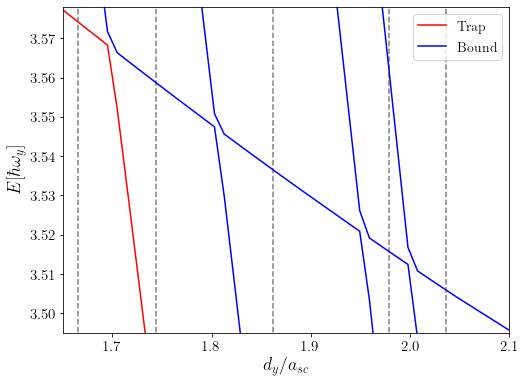

In [67]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
ax2.plot(x, dic['nivel_1004']/wy, 'r')
#for i in range(least_bound_pos+5, least_bound_pos + 11):
#    print(i)
#    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1006']/wy, 'b')
ax2.plot(x, dic['nivel_1007']/wy, 'b')
ax2.plot(x, dic['nivel_1009']/wy, 'b')
ax2.plot(x, dic['nivel_1010']/wy, 'b')
ax2.vlines(x[45], 3.4, 3.58, alpha=0.5, linestyles='--')
ax2.vlines(x[37], 3.4, 3.58, alpha=0.5, linestyles='--')
ax2.vlines(x[25], 3.4, 3.58, alpha=0.5, linestyles='--')
ax2.vlines(x[18], 3.4, 3.58, alpha=0.5, linestyles='--')
ax2.vlines(x[12], 3.4, 3.58, alpha=0.5, linestyles='--')
ax2.set_ylim(3.495, 3.578)
ax2.set_xlim(1.65, 2.1)
ax2.set_xlabel('$d_{y}/a_{sc}$')
ax2.set_ylabel('$E$[$\hbar \omega_{y}$]')
ax2.legend(['Trap', 'Bound'], fontsize=14)
#plt.savefig('Results/Figures/Ix6604_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [62]:
print(f'''To find the eigenstates:
x={x[45]}, delta=0{delta[45]}
x={x[37]}, delta=0{delta[37]}
x={x[25]}, delta=0{delta[25]}
x={x[18]}, delta=0{delta[18]}
x={x[12]}, delta=0{delta[12]}''')

To find the eigenstates:
x=1.6655768332420422, delta=0.70695
x=1.7441419365370092, delta=0.70655
x=1.8615783192707642, delta=0.70595
x=1.9785248836392868, delta=0.70535
x=2.0368158536250967, delta=0.70505


In [89]:
%matplotlib

Using matplotlib backend: MacOSX


In [90]:
fig2, ax2 = plt.subplots(figsize=aursize)
for i in range(least_bound_pos+4, least_bound_pos + 11):
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.set_ylim(3.495, 3.578)
ax2.set_xlim(1.65, 2.1)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
plt.grid()
xcoord = []
ycoord = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    plt.plot(ix, iy, 'ro', markersize=4)
    plt.draw()
    global xcoord, ycoord
    xcoord.append(ix)
    ycoord.append(iy)
    if len(xcoord) == 35:
        fig2.canvas.mpl_disconnect(cid)
        print(f'xcoord: {xcoord}\n ycoord: {ycoord}')
    return xcoord, ycoord
cid = fig2.canvas.mpl_connect('button_press_event', onclick)
plt.show()

xcoord: [1.6512301804264626, 1.6572692479745514, 1.6646503305333267, 1.671136736418311, 1.6776231423032955, 1.6845568865251752, 1.7214622993190516, 1.733764103583677, 1.744947562006064, 1.7588150504498237, 1.7711168547144491, 1.7823003131368358, 1.7943784482330136, 1.8254684626472488, 1.8417963119439336, 1.8558874695561411, 1.872886326358169, 1.8925692131815697, 1.9077787166360158, 1.9281326109647599, 1.9607883095581293, 1.972642775485859, 1.9891942939509917, 1.9979173915204533, 2.016258263333168, 2.0272180525871066, 2.039967195188628, 2.05159799194791, 2.061886773696506, 2.0690441870868335, 2.0782146229931904, 2.0844773597097275, 2.0887270739102344, 2.0938714647845322, 2.0978975098165913]
 ycoord: [3.5770802668030006, 3.5758960609699546, 3.5747118551369086, 3.5733302816650214, 3.571652656734873, 3.5702710832629863, 3.562968480625869, 3.560600068959777, 3.558231657293685, 3.555764561808173, 3.5535935177809215, 3.5512251061148294, 3.549152745906999, 3.5433304005611896, 3.540271202159154

In [91]:
%matplotlib inline

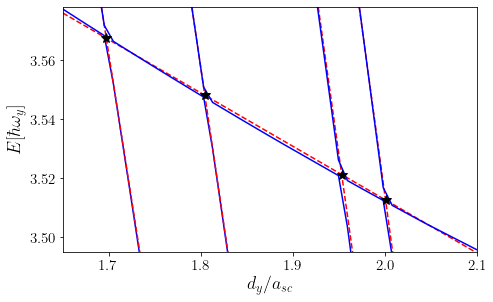

In [135]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1004:
f1004 = np.polyfit(xcoord, ycoord, deg=1)
x1004 = np.linspace(1.65, 2.1, num=40)
ax3.plot(x1004, np.polyval(f1004, x1004), 'r--', markersize=4, label='Diabetic')
ax3.plot(x, dic['nivel_1004']/wy, 'b', label='Adiabatic')

# nivel 1005:
#ax3.plot(x, dic['nivel_1005']/wy, 'b')

# nivel 1006:
f1006 = np.polyfit(x[(x < 1.70) & (x > 1.68)], np.array(dic['nivel_1006'])[(x < 1.70) & (x > 1.68)]/wy, deg=1)
x1006 = np.linspace(1.67, 1.75, num=200)
ax3.plot(x1006, np.polyval(f1006, x1006), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1006']/wy, 'b')


# nivel 1007:
f1007 = np.polyfit(x[(x < 1.81) & (x > 1.78)], np.array(dic['nivel_1007'])[(x < 1.81) & (x > 1.78)]/wy, deg=1)
x1007 = np.linspace(1.78, 1.86, num=200)
ax3.plot(x1007, np.polyval(f1007, x1007), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1007']/wy, 'b')


# nivel 1008:
#ax3.plot(x, dic['nivel_1008']/wy, 'b')
#f1008 = np.polyfit(x[(x < 1.84) & (x > 1.82)], np.array(dic['nivel_1008'])[(x < 1.84) & (x > 1.82)]/wy, deg=1)
#x1008 = np.linspace(1.8, 1.86, num=500)
#ax3.plot(x1008, np.polyval(f1008, x1008), 'r--', markersize=4)

# nivel 1009:
f1009 = np.polyfit(x[(x < 1.94) & (x > 1.87)], np.array(dic['nivel_1009'])[(x < 1.94) & (x > 1.87)]/wy, deg=1)
x1009 = np.linspace(1.9, 1.98, num=200)
ax3.plot(x1009, np.polyval(f1009, x1009), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1009']/wy, 'b')

# nivel 1010:
f1010 = np.polyfit(x[(x < 2) & (x > 1.86)], np.array(dic['nivel_1010'])[(x < 2) & (x > 1.86)]/wy, deg=1)
x1010 = np.linspace(1.97, 2.1, num=200)
ax3.plot(x1010, np.polyval(f1010, x1010), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1010']/wy, 'b')

# Crosses:
##########
ax3.plot(cross_points(f1004, f1006), np.polyval(f1004, cross_points(f1004, f1006)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(f1004, f1007), np.polyval(f1004, cross_points(f1004, f1007)), 'k*', markersize=10)
ax3.plot(cross_points(f1004, f1009), np.polyval(f1004, cross_points(f1004, f1009)), 'k*', markersize=10)
ax3.plot(cross_points(f1004, f1010), np.polyval(f1004, cross_points(f1004, f1010)), 'k*', markersize=10)

# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.68, 3.51), xytext=(1.65, 3.523), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.739, 3.46), xytext=(1.68, 3.435), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(1.925, 3.46), xytext=(1.90, 3.435), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.78, 3.368), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.81, 3.51), xytext=(1.78, 3.523), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E$[$\hbar \omega_{y}$]')
#ax3.legend(fontsize=14, bbox_to_anchor=(1.03, 1))
ax3.set_ylim(3.495, 3.578)
ax3.set_xlim(1.65, 2.1)
plt.tight_layout()
fig3.savefig('Results/Figures/Ix6604_Iy4993_Iz4993_Easc_Interpolation.png', bbox_inches="tight", dpi=200)

In [136]:
print(f'''Crosses between (x, E):
* 1004-1006: ({cross_points(f1004, f1006)}, {np.polyval(f1004, cross_points(f1004, f1006))})
* 1004-1007: ({cross_points(f1004, f1007)}, {np.polyval(f1004, cross_points(f1004, f1007))})
* 1004-1009: ({cross_points(f1004, f1009)}, {np.polyval(f1004, cross_points(f1004, f1009))})
* 1004-1010: ({cross_points(f1004, f1010)}, {np.polyval(f1004, cross_points(f1004, f1010))})''')

Crosses between (x, E):
* 1004-1006: (1.6972476125758829, 3.5673678789282697)
* 1004-1007: (1.8042373394340052, 3.548039231980182)
* 1004-1009: (1.9528760715348008, 3.5211863213320638)
* 1004-1010: (2.000463722441941, 3.512589188406463)


In [140]:
print(f'''ICIR: asc/dy:
* 1004-1006: {1/cross_points(f1004, f1006)}
* 1004-1007: {1/cross_points(f1004, f1007)} 
* 1004-1009: {1/cross_points(f1004, f1009)}
* 1004-1010: {1/cross_points(f1004, f1010)}''')

ICIR: asc/dy:
* 1004-1006: 0.5891892217673045
* 1004-1007: 0.5542508062235887 
* 1004-1009: 0.5120652634214939
* 1004-1010: 0.49988409626309677


In [142]:
np.savetxt('Results/ICIR_positions_6604_4993_4993.txt', 
           [[1.15, 1.15, 1.15, 1.15], [1/cross_points(f1004, f1006), 1/cross_points(f1004, f1007), 1/cross_points(f1004, f1009), 1/cross_points(f1004, f1010)], 
            [np.polyval(f1004, cross_points(f1004, f1006)), np.polyval(f1004, cross_points(f1004, f1007)), np.polyval(f1004, cross_points(f1004, f1009)) ,np.polyval(f1004, cross_points(f1004, f1010))]], 
           header='wx/wy, asc/dy, E/hwy', )